In [ ]:
# Cell 1: Setup
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

notebook_dir = os.getcwd()
print(f"Notebook working directory: {notebook_dir}")

project_root = os.path.dirname(notebook_dir)
print(f"Project root directory: {project_root}")

if project_root not in sys.path:
    sys.path.append(project_root)

scripts_path = os.path.join(project_root, 'scripts')
if scripts_path not in sys.path and os.path.exists(scripts_path):
    sys.path.append(scripts_path)

print("Python paths updated for imports.")

Notebook working directory: d:\Backup folder\OneDrive\Desktop\KAIM_PROJECTS\Week-2\bank-app-review-analysis\notebooks
Project root directory: d:\Backup folder\OneDrive\Desktop\KAIM_PROJECTS\Week-2\bank-app-review-analysis
Python paths updated for imports.


In [16]:
# Cell 2: Import scraper and preprocessing modules
try:
    from scraper import main as run_scraper
    from preprocessing import ReviewPreprocessor
except ImportError as e:
    print("Error importing modules. Check your folder structure and PYTHONPATH.")
    raise e


In [ ]:
# Cell 3: Run scraper
print("🚀 Starting Scraper...")

raw_df = run_scraper()

print("\n✅ Scraping finished.")
display(raw_df.head())


🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3214474
Total Ratings: 38836
Total Reviews: 8333

Abyssinia: Abyssinia Bank
App ID: com.boa.boaMobileBanking
Current Rating: 4.1912227
Total Ratings: 6326
Total Reviews: 1219

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.169666
Total Ratings: 3895
Total Reviews: 769

App information saved to data\raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:06,  3.30s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Abyssinia Bank


Banks:  67%|██████▋   | 2/3 [00:13<00:07,  7.43s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:17<00:00,  5.89s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Abyssinia Bank: 400
  Dashen Bank: 400

Data saved to: data\raw\reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: This application is very important and advantage for transfer of money and finance in the coutry and foriegn country....
Date: 2025-11-27T23:08:20

Rating: ⭐
Review: why didn't work this app?...
Date: 2025-11-27T22:40:35

Rating: ⭐⭐⭐⭐⭐
Review: The app makes our life easier. Thank you CBE!...
Date: 2025-11-27T18:00:06

Abyssinia Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: good jop...
Date: 2025-11-27T13:19:25

Rating: ⭐⭐⭐⭐⭐
Review: ok...
Date: 2025-11-27T12:46:01

Rating: ⭐
Review: bad exprience...it is so crushed...
Date: 2025-11-27T11:41:15

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐


,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_version,source
0,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27T23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27T22:40:35,Yohannesb Adugna,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27T18:00:06,Mohammed Abrahim,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad 👎,1,2025-11-27T16:28:10,Sulxaan Huseen,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27T10:03:41,Sayid Ahmad,0,None,CBE,Commercial Bank of Ethiopia,4.4.0,Google Play


In [ ]:
# Cell 4: Preprocess data
print("🧹 Starting Preprocessing...")

preprocessor = ReviewPreprocessor()
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
    display(df.head())
else:
    print("❌ Preprocessing failed.")


🧹 Starting Preprocessing...
STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_version: 272 (22.67%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-09-30 to 2025-11-27

[4/6] Cleaning text...
Removed 35 reviews with empty or invalid text

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1165 reviews

Saving processed data...
Data saved to: data\processed\reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 35
Invalid ratings removed: 0
Final records: 1165

Data retention rate: 97.08%
Data error rate: 2.92%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Commercial Bank of Ethiopia: 390
  Dashen Bank: 390
  Abyssinia Bank: 385

Rating distribution:
  ⭐⭐⭐⭐⭐: 706 (60.6%)
  ⭐⭐⭐⭐: 88 (7.6%)
  ⭐⭐⭐: 65 (5.6%)
  ⭐⭐: 

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,Abyssinia,Abyssinia Bank,Yohanis Fikadu,0,8,Google Play
1,63f63b8b-016a-4262-a27e-f0de9ebf985a,ok,5,2025-11-27,2025,11,Abyssinia,Abyssinia Bank,Butu Mare,0,2,Google Play
2,f28a3a3c-eb94-4aab-88d2-89bcecebcc7b,bad exprience...it is so crushed,1,2025-11-27,2025,11,Abyssinia,Abyssinia Bank,ሻንበል ኪዳነ,0,32,Google Play
3,4ed89e8c-16dc-4763-94ca-04d05cf799a5,not user friendly at all it requires a huge co...,1,2025-11-26,2025,11,Abyssinia,Abyssinia Bank,Tsegaw Fikru,0,82,Google Play
4,f5bfd792-bc81-4d06-99c9-06c7743d3e09,,1,2025-11-26,2025,11,Abyssinia,Abyssinia Bank,Elsa Tesfay,0,2,Google Play


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_40144\3113376464.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='viridis', ax=axes[i])
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_40144\3113376464.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='viridis', ax=axes[i])
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_40144\3113376464.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='viridis', ax=axes[i])


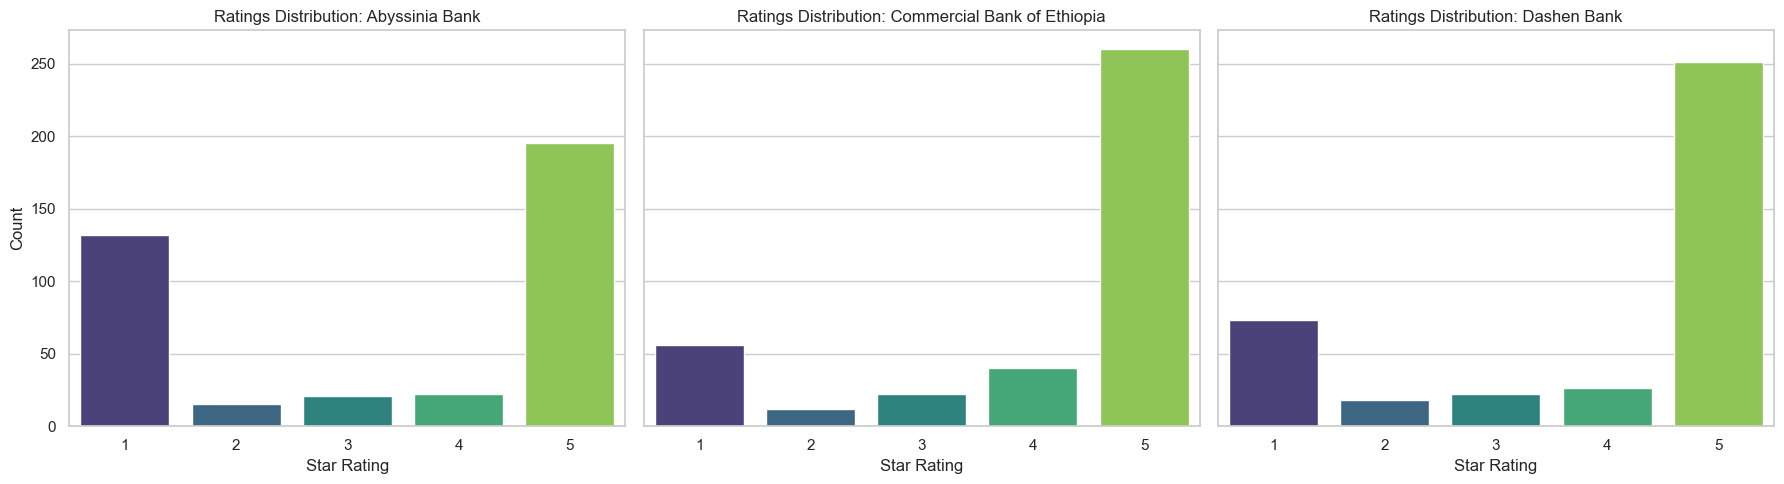

In [ ]:
# Cell 5: Ratings distribution per bank
sns.set(style="whitegrid")
banks = df['bank_name'].unique()
num_banks = len(banks)

fig, axes = plt.subplots(1, num_banks, figsize=(18, 5), sharey=True)
for i, bank in enumerate(banks):
    bank_df = df[df['bank_name'] == bank]
    sns.countplot(x='rating', data=bank_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Ratings Distribution: {bank}')
    axes[i].set_xlabel('Star Rating')
    axes[i].set_ylabel('Count' if i == 0 else '') 

plt.tight_layout()
plt.show()

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_40144\3063329707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


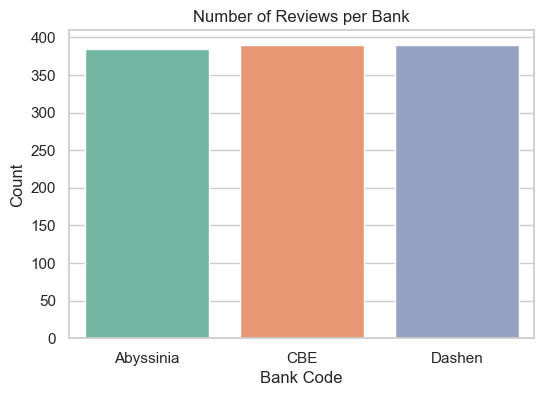

In [11]:
# Cell 6: Number of reviews per bank
plt.figure(figsize=(6,4))

sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank Code')
plt.ylabel('Count')
plt.show()


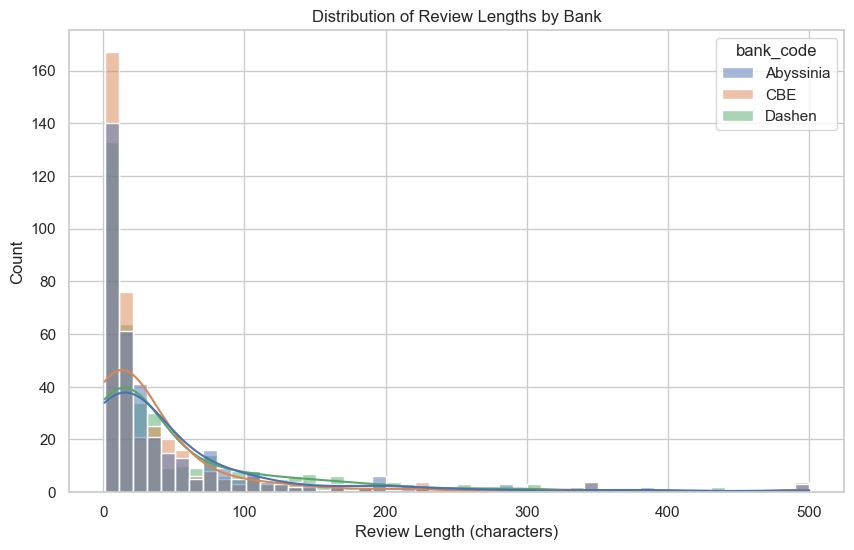

In [12]:
# Cell 7: Review length distribution
plt.figure(figsize=(10,6))

sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()
